# Import modules

In [1]:
import pandas as pd

from pyBiodatafuse import id_mapper
from pyBiodatafuse.viz.patent_data import _process_data_for_plot, get_patent_data
from pyBiodatafuse.viz.utils import plot_hbarplot_chart, plot_pie_chart

In [2]:
chemicals_of_interest = """glucose
Aspirin"""
chem_list = chemicals_of_interest.split("\n")

In [3]:
pubchem_df, pubchem_metadata = id_mapper.pubchem_xref(
    identifiers=chem_list, indentifier_type="name"
)

In [4]:
m = get_patent_data(pubchem_df)

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:04<00:00,  2.06s/it]


# Make data in plotting specific template

In [5]:
df = _process_data_for_plot(m)

# Select specific entry to plot

Since these plotting functions are at server expensive, we recomment to only looks at 1 entity summary at time.

In [7]:
test = df.loc[5793]
test

,label,value
cid,,
5793,US,125
5793,EP,42
5793,WO,25


# Plot pie chart

In [8]:
plot_pie_chart(test, fig_size=(3, 3))

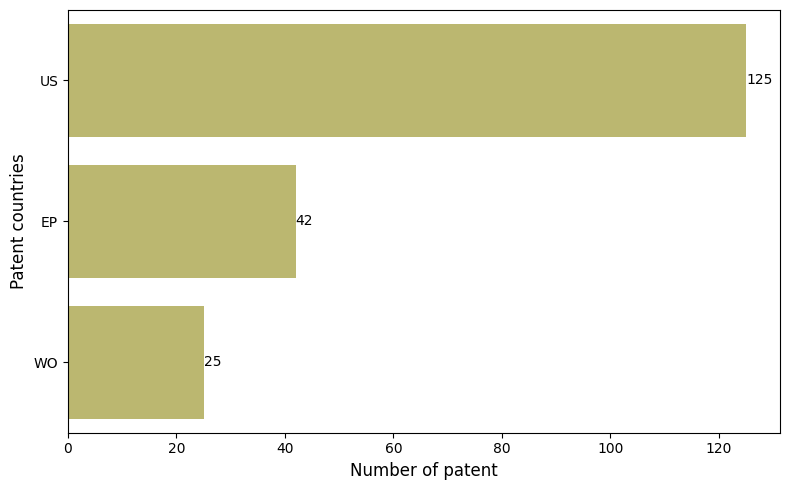

In [9]:
plot_hbarplot_chart(test, x_label="Patent counts", y_label="Patent country", fig_size=(8, 5))

# Plotly based plots

In [12]:
plotly_pie_chart(test, fig_size=(8, 5))

In [16]:
import plotly.express as px


def plotly_barplot_chart(
    template_df: pd.DataFrame,
    x_label: str = "Label",
    y_label: str = "Value",
    fig_size: tuple = (10, 10),
) -> px:
    """Plot a bar plot using Plotly.

    :param template_df: A dataframe with two columns: "label" and "value"
    :param x_label: The x-axis label
    :param y_label: The y-axis label
    :param fig_size: A tuple with the size of the figure
    :returns: A bar plot
    """
    fig = px.bar(template_df, x="value", y="label").update_layout(
        xaxis_title=x_label, yaxis_title=y_label
    )

    return fig.show()

In [17]:
plotly_barplot_chart(test, fig_size=(8, 5))